In [10]:
import numpy as np
import pandas as pd

In [11]:
from utils import get_range, get_metrics
from models import NaiveSharpe

In [12]:
# Past date range
past_start_date = "2022-08-08"
past_end_date = "2023-08-07"

# Future date range
future_start_date = "2023-08-08"
future_end_date = "2024-08-07"

c:\Users\zeyuan\OneDrive\Desktop\qrt-paper-trading\spx\utils.py:39: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = price_df.pct_change()


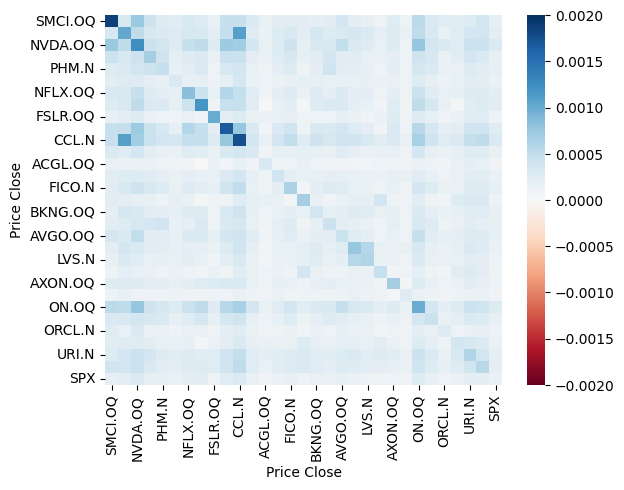

In [13]:
# Load in the full price dataframes
price_df = pd.read_pickle("./spx-past-3-years/spx_past_3_years")
index_price_df = pd.read_pickle("./spx-past-3-years/spx_index_past_3_years")

# Get prices for selected date ranges
past_price_df = get_range(past_start_date, past_end_date, price_df)
past_spx_df = get_range(past_start_date, past_end_date, index_price_df)

# Join stocks and index dataframes
past_price_df = pd.concat([past_price_df, past_spx_df], axis=1)

# Get metrics for past price history
daily_returns, daily_log_returns, \
annualised_returns, annualised_log_returns, \
top_n_stocks, covariance_matrix = get_metrics(past_price_df, n=30, show=True)

OPTIMIZED SHARPE RATIO:
--------------------------------------------------------------------------------
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -863.782877987561
       x: [ 1.795e-01  5.665e-02 ...  1.925e-11  2.213e-11]
     nit: 26
     jac: [ 2.453e-02 -2.274e-02 ...  4.160e+02  4.577e+02]
    nfev: 801
    njev: 25
--------------------------------------------------------------------------------


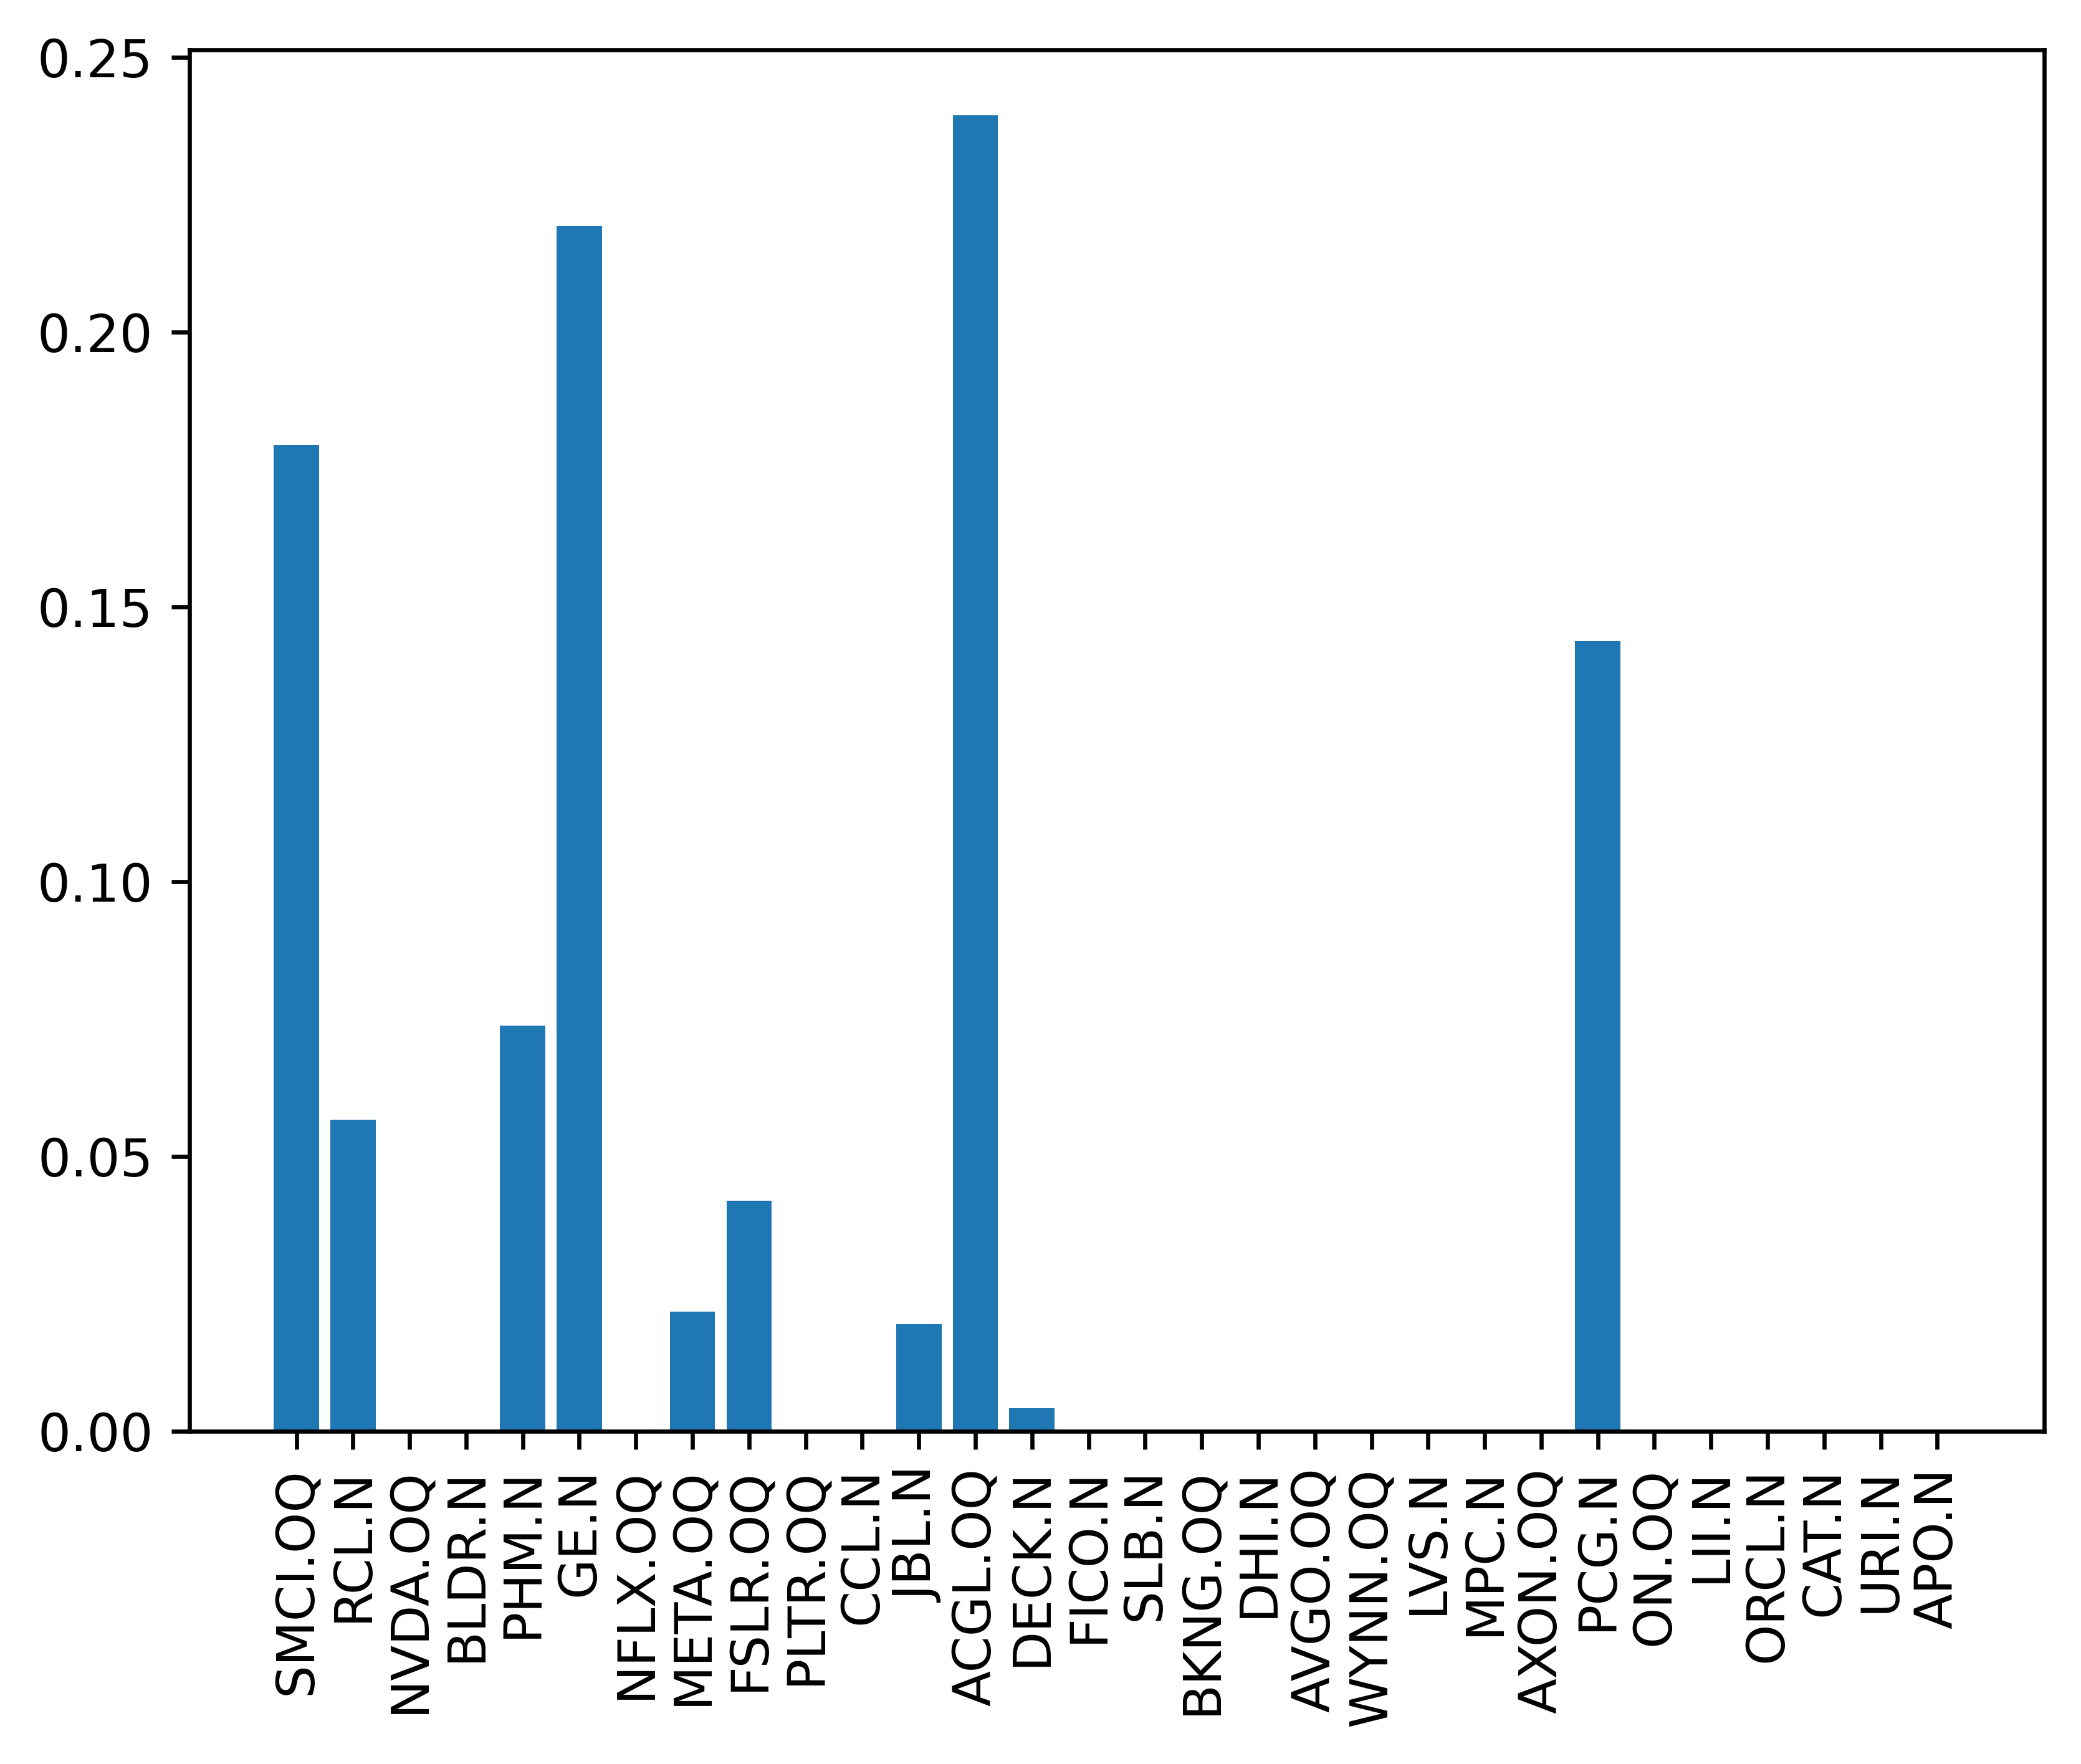

In [14]:
naive_model = NaiveSharpe(annualised_log_returns, top_n_stocks, covariance_matrix)
naive_model.optimise()

In [15]:
naive_model.hedge()

### Load future price data

In [16]:
# Get prices for selected date ranges
future_price_df = get_range(future_start_date, future_end_date, price_df)
future_spx_df = get_range(future_start_date, future_end_date, index_price_df)

# Join stocks and index dataframes
future_price_df = pd.concat([future_price_df, future_spx_df], axis=1)

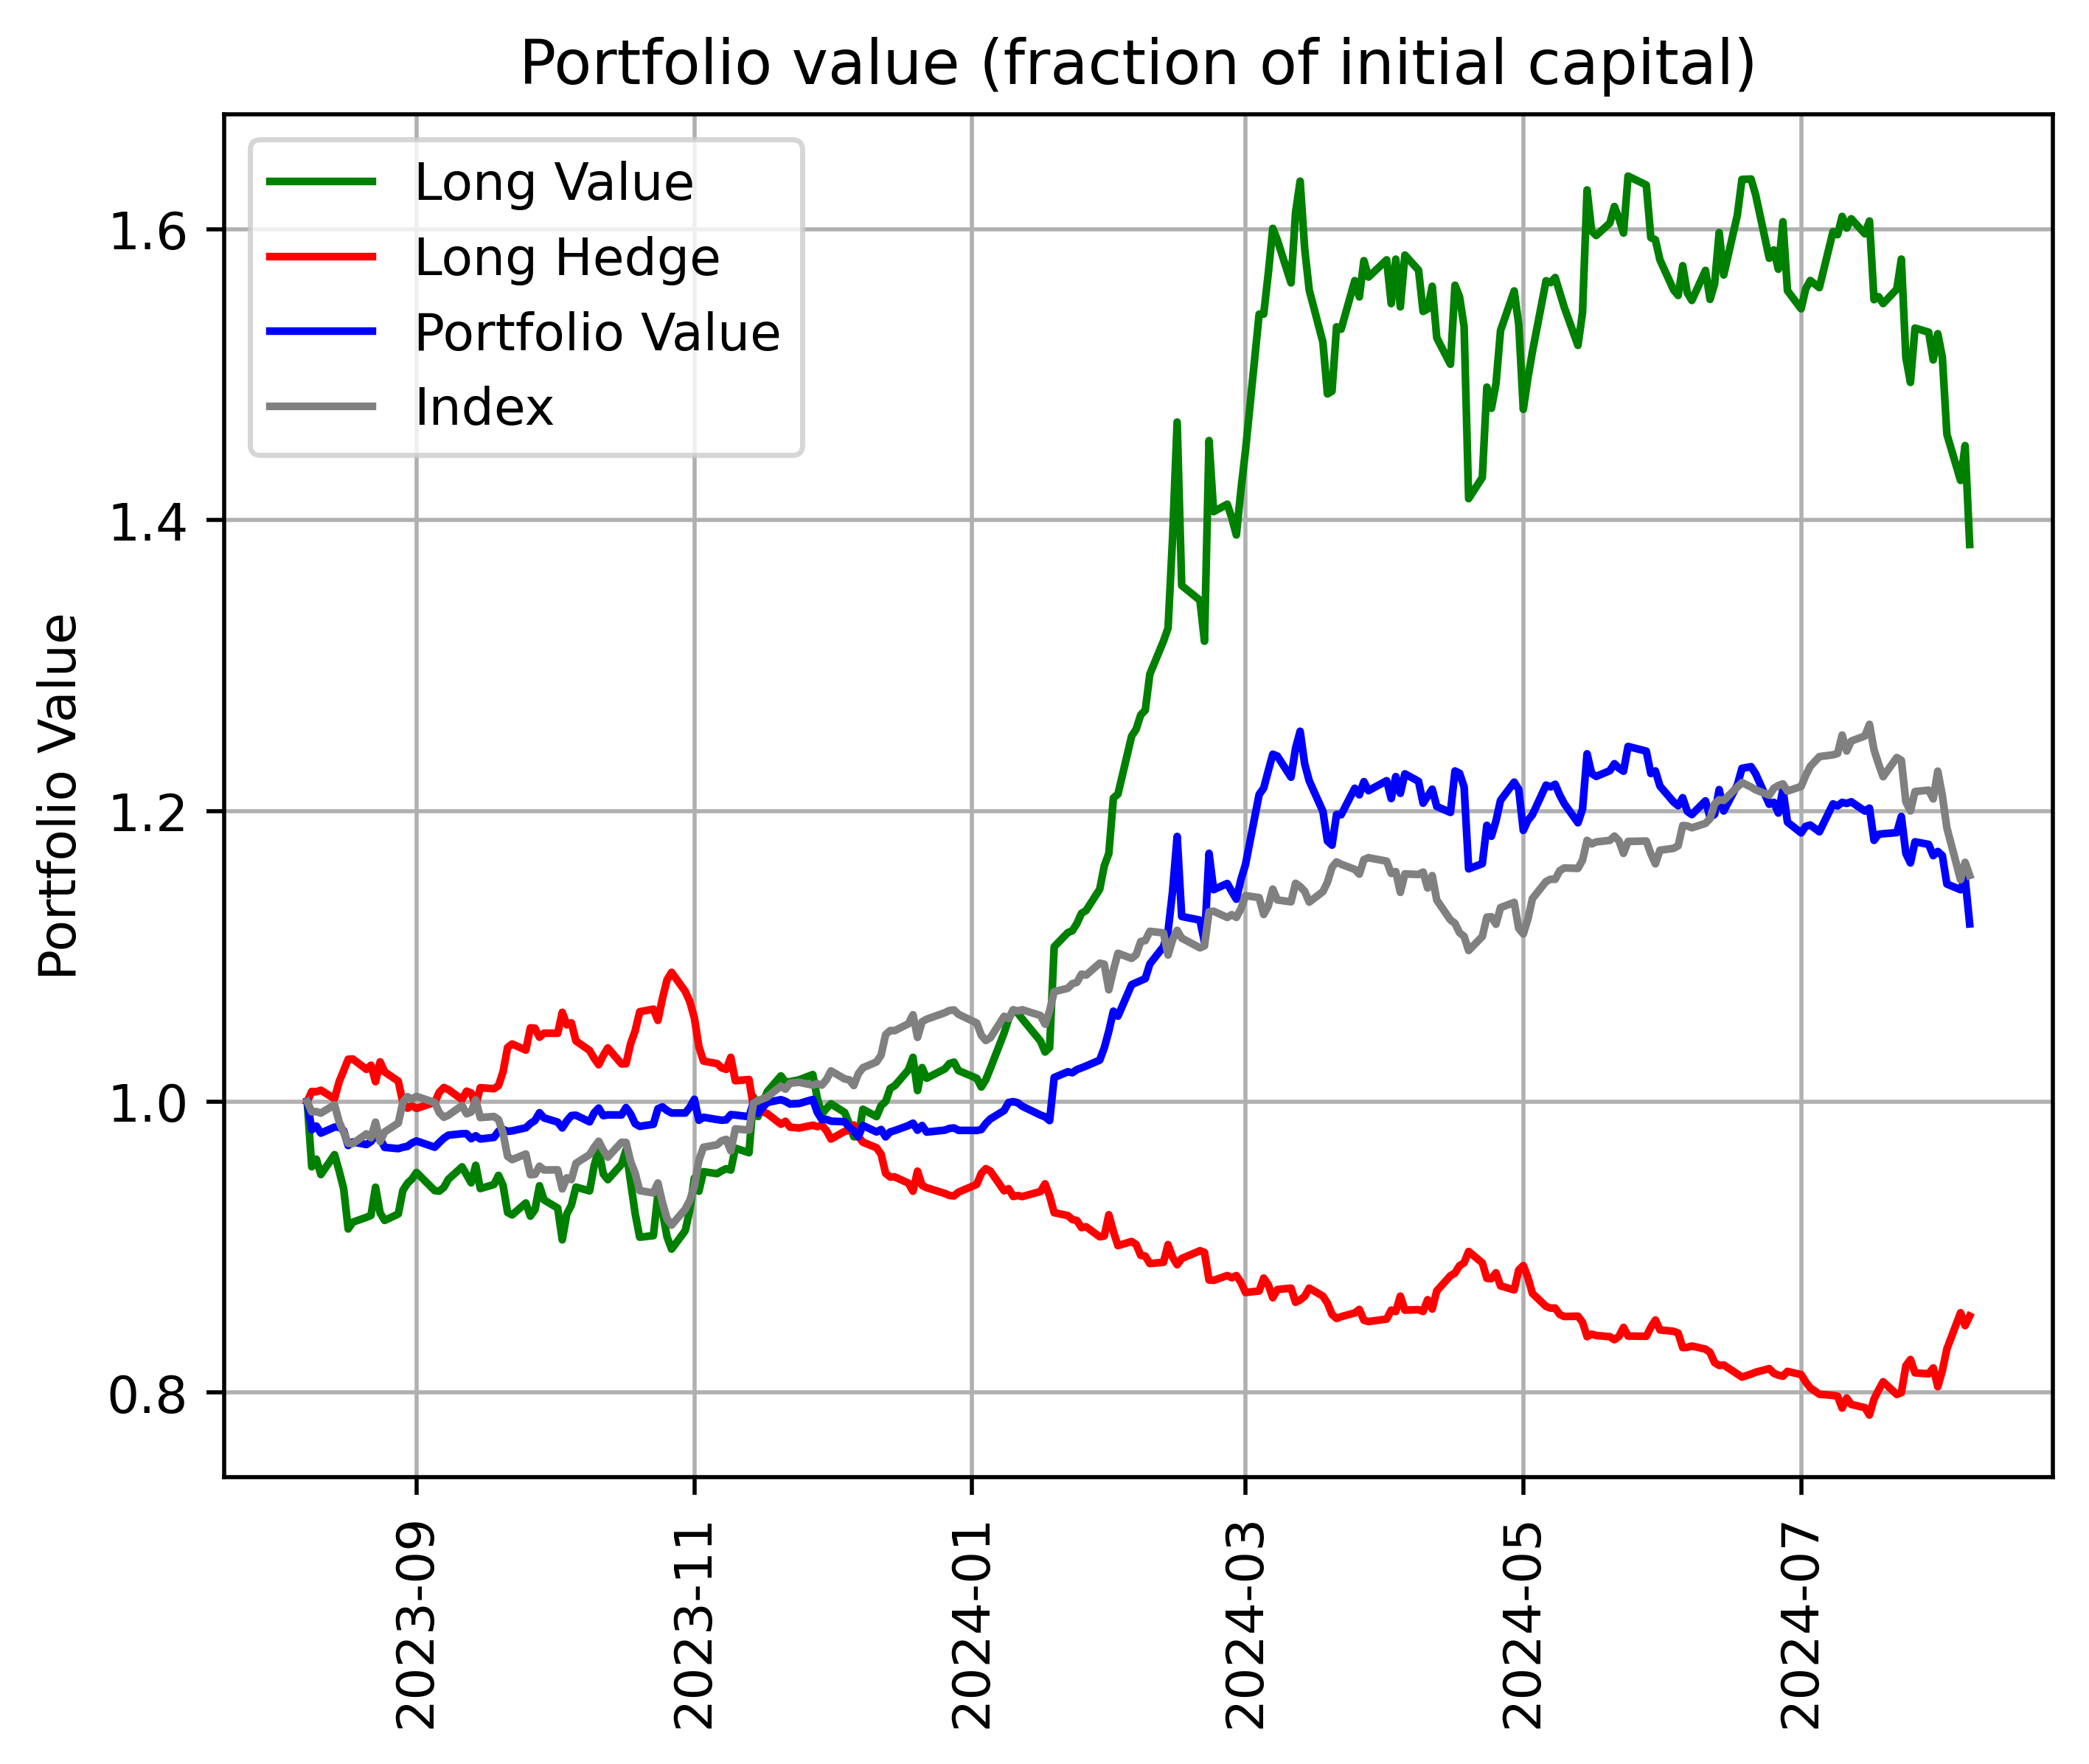

Index Sharpe:  1.27189548297252
Portfolio Sharpe:  0.733666669611129
Correlation:  0.3654132588180001


In [17]:
naive_model.backtest(future_price_df)